In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import pandas as pd
import psycopg2
import module


In [3]:
db_record = {
    'ID' :[],
    'name': [],
    'face': [],
    'face_encode' : []
}
# Connect to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="Attendance manager",
    user="postgres",
    password="password",
    port="5432"
)

# Create a cursor
cur = conn.cursor()

# Query to retrieve the binary image data and the shape
cur.execute('SELECT id, name, Face BYTEA, image_shape, db_encode FROM GeneralAttendance')  # Adjust to get the correct row
result = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()


for row in result:
    db_record['ID'].append(row[0])
    db_record['name'].append(row[1]) 
    db_record['face_encode'].append(np.fromstring(row[4].strip("[]"), sep=" "))
    binary_data = row[2]  # The binary image data (BYTEA)
    image_shape = eval(row[3])  # Convert the image shape from text to tuple

    binary_data = bytes.fromhex(binary_data[2:])
    image_data = np.frombuffer(binary_data, dtype=np.uint8)
    face = image_data.reshape(image_shape)
    db_record['face'].append(face)

dbase = pd.DataFrame(db_record)



In [3]:
db_encoded = db_record['face_encode']
db_faces = db_record['face']
unique_encoded = db_record['face_encode']
unique_faces = db_record['face']
init_len = len(db_encoded)
date = '25-10-2024'
dbase[date] = False

i = 1
path = 'Face2'

for dir in os.listdir(path):
    file = os.path.join(path,dir)
    img = cv.imread(file)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

    faces = []
    encode = face_recognition.face_encodings(img)
    face_locations = face_recognition.face_locations(img)

    #create the buffer for each face location and extract the face from the image
    for loc in face_locations:
        top,right,bottom,left = buffer(loc)
        face = img[top:bottom, left:right]
        faces.append(face)

    #if we have an empty list for unique faces, update it with the newly encoded
    if len(unique_encoded)== 0:
        unique_encoded = encode
        unique_faces = faces
        print(f"INITIAL UPDATE. {len(unique_encoded)} faces")

    # Else, check if it matches any in the DB or today's faces, mark present or leave absent
    else:
        for n in range(0,len(encode)):
            matches = face_recognition.compare_faces(unique_encoded, encode[n],0.4)
            #if no true value is found in matches, update as unique
            if not any(matches):
                #unique_encoded.append(encode[n])
                unique_encoded = np.concatenate((unique_encoded,[encode[n]]))
                unique_faces.append(faces[n])
                
            #if any true value is found in matches(It matches faces in our record), feed another separate list
            if any(matches):
                dist = face_recognition.face_distance(unique_encoded, encode[n])
                #close_idx = dist.index(min(dist))
                close_idx = np.argmin(dist)  # Use np.argmin to get the index of the minimum value
                #dbase.iloc[close_idx][date] = True
                dbase.loc[close_idx, date] = True

    #plt.imshow(img)
    print(f"{i} completed, {len(encode)} faces")
    i = i+1
print(f"Done. {len(db_encoded)-init_len} new faces")


KeyboardInterrupt: 

In [6]:
import module
import pandas as pd

db_record = module.retrieve_from_db()
unique_encoded = db_record['face_encode']
unique_faces = db_record['face']
init_len = len(unique_encoded)
date = 'D25_10_2024'
today = [False] * len(unique_faces)

i = 1
path = 'Face2'

for dir in os.listdir(path):
    file = os.path.join(path,dir)
    img = cv.imread(file)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

    faces = []
    encode = face_recognition.face_encodings(img)
    face_locations = face_recognition.face_locations(img)

    #create the buffer for each face location and extract the face from the image
    for loc in face_locations:
        top,right,bottom,left = module.buffer(img,loc)
        face = img[top:bottom, left:right]
        faces.append(face)
    unique_faces,unique_encoded,today = module.process_image(unique_encoded, unique_faces,encode,faces,today)
    
    print(f"{i} completed, {len(encode)} faces")
    i = i+1


print(f"Done. {len(unique_encoded)-init_len} new faces")


KeyboardInterrupt: 

In [4]:
update_database(unique_encoded,unique_faces,init_len)

NameError: name 'unique_encoded' is not defined

## LIVE ATTENDANCE

,name,face,face_encode
0,None,"[[[166, 161, 70], [137, 134, 53], [114, 111, 4...","[-0.18207389, 0.09845185, 0.14208061, -0.12798..."
1,None,"[[[21, 21, 19], [16, 16, 14], [22, 22, 20], [2...","[-0.20037054, 0.14445959, 0.0945311, -0.016889..."
2,None,"[[[126, 121, 55], [126, 121, 55], [126, 121, 5...","[-0.2448585, 0.12003864, 0.0757712, -0.0108621..."
3,None,"[[[20, 22, 19], [21, 23, 20], [22, 24, 21], [2...","[-0.22696961, 0.08611412, 0.12058324, -0.05164..."
4,None,"[[[74, 79, 47], [74, 81, 47], [76, 83, 49], [7...","[-0.17892317, 0.0670862, 0.07294105, -0.124285..."
5,None,"[[[19, 19, 17], [18, 18, 16], [17, 17, 15], [1...","[-0.171252459, 0.0703942999, 0.0516260117, -0...."
6,None,"[[[9, 13, 24], [14, 18, 29], [19, 23, 34], [22...","[-0.08739144, 0.06078542, 0.03407051, -0.06409..."


In [71]:
cleaned_string = df['db_encode'][0].replace('\n', ' ').replace('  ', ' ').strip()
array_list = ast.literal_eval(cleaned_string)
numpy_array = np.array(array_list)

print(type(numpy_array))
print()
df['db_encode'][0]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [93]:
import ast

face_string = df['db_face'][0]  # Assuming the data in db_face is stored as a string
face_array = ast.literal_eval(face_string)  # Safely convert the string to a Python list
im = np.array(face_array, dtype=np.uint8)  # Convert the list to a NumPy array with dtype uint8
im

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

TypeError: Image data of dtype <U629 cannot be converted to float

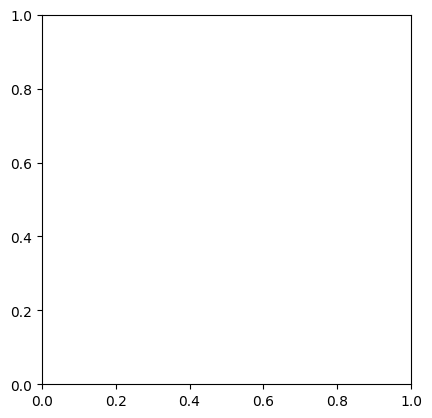

In [87]:
plt.imshow(im)

In [27]:
db_face = unique_faces
db_encode = unique_encoded

date = '01-01-2000'
dattend = np.zeros(len(db_face))